<a href="https://colab.research.google.com/drive/1lwIIEjrUJTXSo2UBtn2I4CL9zMkFX2pQ?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Midterm - Summer 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite.

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`.






---



### Question 1 - Feature Engineering (5 points)

Write the posterior probability expressions for logistic regression for the problem you are given to solve.

$$p(y=1| \mathbf{x}, \mathbf w)=\frac{1}{1+e^{-\mathbf w^{T}\mathbf{x}}}$$

$$p(y=0| \mathbf{x}, \mathbf w)=\frac{e^{-\mathbf w^{T}\mathbf{x}}}{1+e^{-\mathbf w^{T}\mathbf{x}}}$$

*   $p(y=1| \mathbf{x}, \mathbf w)$ is the probability of being infected with a parasite given the input features $\mathbf{x}$ and model weights $\mathbf w$.
*   $p(y=0| \mathbf{x}, \mathbf w)$ is the probability of not being infected with a parasite given the input features $\mathbf{x}$ and model weights $\mathbf w$.
*   $\mathbf w^{T}\mathbf{x}$ is the linear combination of the input features $\mathbf{x}$ and model weights $\mathbf w$ $(w_0 + w_1x_1 + ... + w_mx_m)$.



---





### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.





Assuming that $p(y=1)=p(y=0)$. The decision boundary can be expressed as:
$$p(y=1| \mathbf{x}, \mathbf w)=0.5 = \frac{1}{1+e^{-\mathbf w^{T}\mathbf{x}}}$$
$$ 1+e^{-\mathbf w^{T}\mathbf{x}} = 2$$
$$ e^{-\mathbf w^{T}\mathbf{x}} = 1$$
$$ -\mathbf w^{T}\mathbf{x} = ln(1) = 0$$

Therefore, the decision boundary can be written as the linear combination of the input features $\mathbf{x}$ and model weights $\mathbf w$ when equal to zero.

 $$w_0 + w_1x_1 + ... + w_mx_m=0$$



---





### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem.

NOTE: The loss will be a function that will include this function:

$$\sigma(a) = \frac{1}{1+e^{-a}}$$



To train this logistic regression problem, we need to use the **Binary Cross-Entropy Loss Function**, which is the mathematical function that measures the difference between predicted probabilities and actual binary labels in classification tasks.

$$L_{CE} = \frac{1}{m} \left(\sum_{i=1}^m y_i log(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i)\right) $$

Where:
*   $m$ is the number of training examples.
*   $y_i$ is the true label of the $i_{th}$ training example.
*   $\hat{y}_i$ is the predicted probability of the $i_{th}$ training example.

$\hat{y}_i$ can also be expressed using the sigmoid function as:
$$\hat{y}_i = \sigma(\mathbf w^{T}\mathbf{x}_i)$$



---




### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.



Expressions to use:

*   $$L(\mathbf w) = - [y*log(\hat{y}) + (1-y) log(1-\hat{y})] $$
*   $$\hat{y} = \sigma(z) =\frac{1}{1+e^{-z}}$$
*   $$z = w_0 + w_1x_1 + ... + w_mx_m=\mathbf w^{T}\mathbf{x}$$






$$ \nabla_\mathbf w L_{CE} = \frac{\delta L(\mathbf w)}{\delta \mathbf w} = \frac{\delta L(\mathbf w)}{\delta \hat{y}} \frac{\delta \hat{y}}{\delta z} \frac{\delta z}{\delta \mathbf w}$$

*   $$\frac{\delta L(\mathbf w)}{\delta \hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}} \right) = \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} $$
*   $$\frac{\delta \hat{y}}{\delta z} = \frac{\delta}{\delta z}\left[ \frac{1}{1+e^{-z}} \right] = -(1+e^{-z})^{-2}(-e^{-z}) = \frac{1}{1+e^{-z}} \frac{(1+e^{-z})-1}{(1+e^{-z})} = \frac{1}{1+e^{-z}} \left( \frac{1+e^{-z}}{1+e^{-z}}-\frac{1}{1+e^{-z}}\right) = \frac{1}{1+e^{-z}}\left( 1-\frac{1}{1+e^{-z}}\right) = \hat{y}(1-\hat{y})$$
*   $$\frac{\delta z}{\delta \mathbf w} = \mathbf{x}$$


$$ \frac{\delta L(\mathbf w)}{\delta \mathbf w} = \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} \hat{y}(1-\hat{y})\mathbf{x} = (\hat{y}-y)\mathbf{x} $$



---



### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?



I think the logistic regression model may be biased towards predicting $p(y=0)$ over $p(y=1)$, because the model tries to minimize the overall loss, which is dominated by the majority class affecting the accuracy of the logistic regression.

In such imbalanced datasets, evaluation metrics that are robust to class imbalance, such as precision, recall, and F1 score.

An alternative is to implement a Weighted Logistic Regression:

Weighting is a procedure that weights the data to compensate for differences in sample and population. For example, in rare events (such as fraud in credit risk, deaths in medical literature) we tend to sample all the 1’s (rare events) and a fraction of 0’s (non events). In such cases we have to weight the observations accordingly.

Example: Let us say, In a population of 500,000 transactions there are 50 fraud transactions. In this case you would

*   Sample all 50 frauds transaction (100% of the fraud)
*   10% of the good transactions (10% of 500,000 is 50,000 good transactions)

In this case you would assign a weight of 1 for fraud transactions and a weight of 10 for good transactions.


### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills.

1. Use the dataset to train a logistic regressor that will predict the target variable $y$.

2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$.

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.



In [76]:
# Importing libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.impute import SimpleImputer

In [77]:
# Loading the dataset

data = pd.read_csv('https://raw.githubusercontent.com/DavidGomezCamargo/CS634-Data-Mining/main/CBC_data.csv', index_col=0)
data.head()

,SEX,TYPEAREA,SEX.REPRO,REPRO.STATUS,AGE,PARASITE_STATUS,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT
ID,,,,,,,,,,,,,,
grls5ZUT2BYY,Male,Suburban,IntactMale,Intact,9,Negative,6.4,16.6,14.2,142.0,852.0,6390.0,210.0,6816.0
grls8DCONYUU,Female,Rural,NeuteredFemale,Neutered,6,Negative,4.8,12.5,10.0,400.0,300.0,4800.0,209.0,4500.0
grlsUC5R4PTT,Male,Suburban,IntactMale,Intact,14,Negative,6.2,17.3,9.5,190.0,475.0,7315.0,164.0,1520.0
grlsXUR2PY88,Male,Rural,IntactMale,Intact,6,Negative,5.4,13.8,14.1,1692.0,423.0,7755.0,254.0,4230.0
grlsTBZUF3GG,Female,Rural,IntactFemale,Intact,18,Negative,5.9,14.4,6.5,390.0,130.0,2795.0,213.0,3185.0


In [78]:
# Preprocessing data

X = data.drop('PARASITE_STATUS', axis=1)
y = data['PARASITE_STATUS']

# Defining column transformers for different preprocessing steps

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Identifying numeric and categorical columns

numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Preparing the data for training

X = preprocessor.fit_transform(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [79]:
# Spliting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [80]:
# Defining a function to retrieve the next batch of data

def next_batch(X, y, batch_size):
    num_samples = X.shape[0]
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    for i in range(0, num_samples, batch_size):
        batch_indices = indices[i:i+batch_size]
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        yield X_batch, y_batch

In [81]:
# Defining a function to train and evaluate the logistic regression model with different hyperparameters

def train_evaluate_model(learning_rate, batch_size):
    model = SGDClassifier(loss='log', learning_rate='constant', eta0=learning_rate, max_iter=1000, warm_start=True)
    batches = next_batch(X_train, y_train, batch_size)
    f1_scores = []
    for X_batch, y_batch in batches:
        model.partial_fit(X_batch, y_batch, classes=np.unique(y))
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
    return f1_scores

In [82]:
# Defining a function to perform hyperparameter optimization using grid search

def hyperparameter_optimization(learning_rates, batch_sizes):
    f1_scores = []
    for lr in learning_rates:
        for bs in batch_sizes:
            f1 = train_evaluate_model(lr, bs)
            f1_scores.extend(f1)
    return f1_scores

In [83]:
# Specifying the learning rates and batch sizes to try

learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

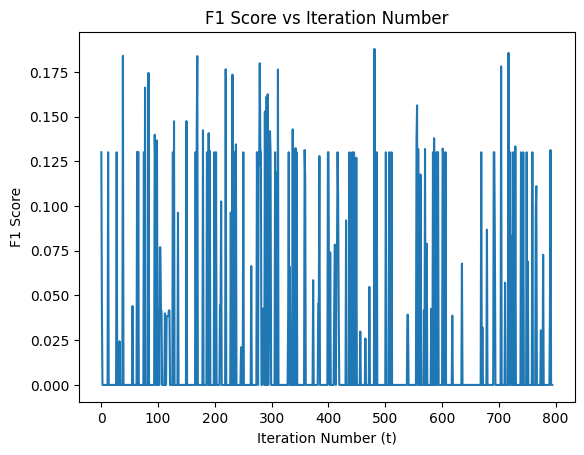

In [84]:
# Performing hyperparameter optimization and plot the F1 scores

f1_scores = hyperparameter_optimization(learning_rates, batch_sizes)

plt.plot(range(len(f1_scores)), f1_scores)
plt.xlabel('Iteration Number (t)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Iteration Number')
plt.show()

In [85]:
# Converting target variable to numeric labels

X = data.drop('PARASITE_STATUS', axis=1)
y = data['PARASITE_STATUS']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [86]:
# Performing train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Handling missing values

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_imputer = SimpleImputer(strategy='mean')
X_train_numeric = numeric_imputer.fit_transform(X_train[numeric_features])
X_test_numeric = numeric_imputer.transform(X_test[numeric_features])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical = categorical_imputer.fit_transform(X_train[categorical_features])
X_test_categorical = categorical_imputer.transform(X_test[categorical_features])

# Encoding categorical features

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = one_hot_encoder.fit_transform(X_train_categorical)
X_test_encoded = one_hot_encoder.transform(X_test_categorical)

# Concatenating numeric and encoded categorical features

X_train_processed = np.concatenate((X_train_numeric, X_train_encoded), axis=1)
X_test_processed = np.concatenate((X_test_numeric, X_test_encoded), axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [88]:
# Defining the hyperparameters for GridSearchCV

hyperparameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Defining the model

model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, hyperparameters, scoring='f1')
grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [89]:
# Geting the best hyperparameters

best_params = grid_search.best_params_
learning_rate = best_params['C']
solver = best_params['solver']

# Training the logistic regression model with the best hyperparameters

model = LogisticRegression(C=learning_rate, solver=solver, max_iter=1000)
model.fit(X_train_processed, y_train)

# Making predictions on the test set

y_pred = model.predict(X_test_processed)

# Calculating precision, recall, and F1 score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.04878048780487806
Precision: 1.0
Recall: 0.025
